# Midterm with Scikit-Learn
* Due Date: July 18, 2018
* by: Jose Medina

### Import the Libraries:
1. numpy
2. matplotlib.pyplot
3. pandas
4. seaborn

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import csv
import string
import pprint

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB

## Problem 1: 
For this problem, you are asked to use the Python algorithms developed in class for the Principle Component Analysis (PCA) implementation to investigate dimensionality reduction of the  “breast cancer” dataset provided by Scikit-Learn.
1. You should implement PCA in two different ways and in each case show the Eigen values and Eigen vectors:
    1. using the eigenvector decomposition of the covariance matrix
    2. using Singular Value Decomposition (SVD) method  

2. Provide a plot that shows the level of data variance retained as a function of dimensionality reduction.
3. Using the first two Eigen vectors, show a two-dimensional plot of the dataset with the reduced number of features. The points on the plot should be color-coded based on their values.
4. How many Eigen vectors should be used to retain 95% of the data variance.



#### Read the Digit Data

In [2]:
# Import Dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Explore dataset
print('Keys = \n',cancer.keys(),'\n')
print('Description = \n',cancer['DESCR'])


#load the cancer dataset
X = cancer.data
y = cancer.target

# Infor about the data
# Print the number of 8 by 8 images
print("Data Size: " , X.shape)

# Print the number of labels
print("Number of Labels :", y.shape)

Keys = 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names']) 

Description = 
 Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For i

#### Split the data 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 99)

print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (455, 30)
X_test shape =  (114, 30)
y_train shape =  (455,)
y_test shape =  (114,)


In [4]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
print(cancer['target'][0:25])
print(cancer['target_names'])
df.head(2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Scikit-learn implementation. 

In [5]:
# Scale the data
sc = StandardScaler()
sc.fit(df)
sc_data = sc.transform(df)

In [6]:
# Apply PCA
pca = PCA(n_components=2)
pca.fit(sc_data)
xpca = pca.transform(sc_data)
sc_data.shape, xpca.shape

((569, 30), (569, 2))

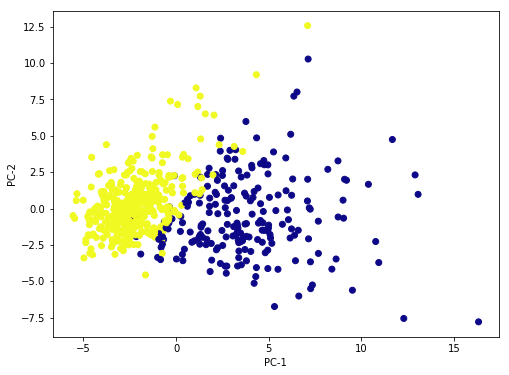

In [7]:
# Visualize Data
plt.figure(figsize=(8,6))
plt.scatter(xpca[:,0], xpca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.show()

In [8]:
# Show Eigenvectors
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

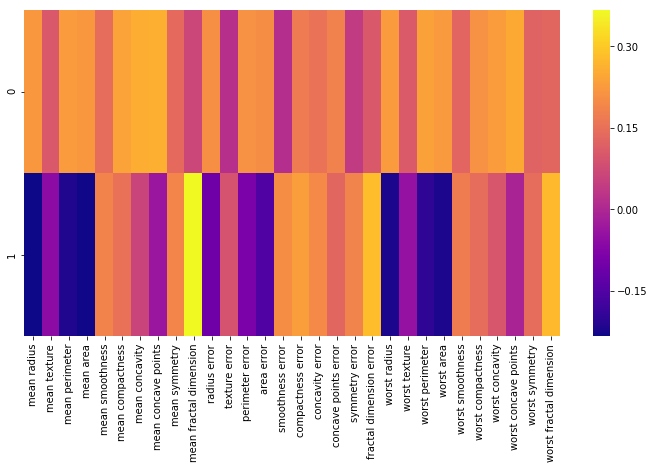

In [9]:
df_components = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df_components
plt.figure(figsize=(12,6))
sns.heatmap(df_components, cmap='plasma')
plt.show()

### Own Implementation of a Dimensional Reduction

In [10]:
# Scale Data
X = sc_data.T

In [11]:
# Compute the eigen values and the eigen vectors:
sigma = np.dot(X, X.T)
v, W = np.linalg.eig(sigma)
print('Eigenvalues: v=\n', v, '\n')
print('Eigenvectors W=\n', W)

Eigenvalues: v=
 [  7.55723477e+03   3.23838077e+03   1.60341297e+03   1.12698443e+03
   9.38127682e+02   6.86985912e+02   3.84200245e+02   2.71195153e+02
   2.37213148e+02   1.99544577e+02   1.67238031e+02   1.48600820e+02
   1.37332415e+02   8.93385328e+01   5.35627951e+01   4.54419337e+01
   3.37980525e+01   2.99400878e+01   2.81527497e+01   7.57025042e-02
   4.26068962e-01   9.04333249e-01   3.92636394e+00   4.65307708e+00
   8.80884341e+00   1.02732990e+01   1.38499367e+01   1.56130200e+01
   1.77297000e+01   1.70545766e+01] 

Eigenvectors W=
 [[  2.18902444e-01  -2.33857132e-01  -8.53124284e-03   4.14089623e-02
   -3.77863538e-02   1.87407904e-02   1.24088340e-01   7.45229622e-03
   -2.23109764e-01   9.54864432e-02   4.14714866e-02   5.10674568e-02
    1.19672116e-02  -5.95061348e-02  -5.11187749e-02   1.50583883e-01
   -2.02924255e-01  -1.46712338e-01   2.25384659e-01   7.02414091e-01
   -2.11460455e-01   2.11194013e-01   1.31526670e-01  -1.29476396e-01
   -1.92264989e-02   1.82

In [12]:
# Sort the eigen values in descending order, and correspondingly the eigen vectors:
n = X.shape[0] #Number of features
v_indices = np.argsort(v)[::-1][:n]
v = v[v_indices]
W = W[:,v_indices]
print(v,'\n', W)

[  7.55723477e+03   3.23838077e+03   1.60341297e+03   1.12698443e+03
   9.38127682e+02   6.86985912e+02   3.84200245e+02   2.71195153e+02
   2.37213148e+02   1.99544577e+02   1.67238031e+02   1.48600820e+02
   1.37332415e+02   8.93385328e+01   5.35627951e+01   4.54419337e+01
   3.37980525e+01   2.99400878e+01   2.81527497e+01   1.77297000e+01
   1.70545766e+01   1.56130200e+01   1.38499367e+01   1.02732990e+01
   8.80884341e+00   4.65307708e+00   3.92636394e+00   9.04333249e-01
   4.26068962e-01   7.57025042e-02] 
 [[  2.18902444e-01  -2.33857132e-01  -8.53124284e-03   4.14089623e-02
   -3.77863538e-02   1.87407904e-02   1.24088340e-01   7.45229622e-03
   -2.23109764e-01   9.54864432e-02   4.14714866e-02   5.10674568e-02
    1.19672116e-02  -5.95061348e-02  -5.11187749e-02   1.50583883e-01
   -2.02924255e-01  -1.46712338e-01   2.25384659e-01  -4.96986642e-02
    6.85700057e-02  -7.29289034e-02   9.85526942e-02   1.82579441e-01
   -1.92264989e-02  -1.29476396e-01   1.31526670e-01   2.11

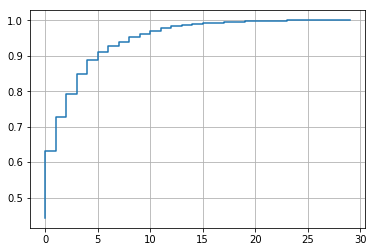

In [13]:
# Provide a plot that shows the level of data variance retained as a function of dimensionality reduction.
sv = np.cumsum(v)/sum(v)
plt.step(list(range(len(sv))), sv)
plt.grid(True)
plt.show()

In [14]:
# Let’s take the first two columns (Principle Components) of U and call it Ur
wr = W[:, 0:2]
print('wr=\n', wr)

# Project the data X onto the reduced matrix Ur
Xr = np.dot(X.T, wr)

wr=
 [[ 0.21890244 -0.23385713]
 [ 0.10372458 -0.05970609]
 [ 0.22753729 -0.21518136]
 [ 0.22099499 -0.23107671]
 [ 0.14258969  0.18611302]
 [ 0.23928535  0.15189161]
 [ 0.25840048  0.06016536]
 [ 0.26085376 -0.0347675 ]
 [ 0.13816696  0.19034877]
 [ 0.06436335  0.36657547]
 [ 0.20597878 -0.10555215]
 [ 0.01742803  0.08997968]
 [ 0.21132592 -0.08945723]
 [ 0.20286964 -0.15229263]
 [ 0.01453145  0.20443045]
 [ 0.17039345  0.2327159 ]
 [ 0.15358979  0.19720728]
 [ 0.1834174   0.13032156]
 [ 0.04249842  0.183848  ]
 [ 0.10256832  0.28009203]
 [ 0.22799663 -0.21986638]
 [ 0.10446933 -0.0454673 ]
 [ 0.23663968 -0.19987843]
 [ 0.22487053 -0.21935186]
 [ 0.12795256  0.17230435]
 [ 0.21009588  0.14359317]
 [ 0.22876753  0.09796411]
 [ 0.25088597 -0.00825724]
 [ 0.12290456  0.14188335]
 [ 0.13178394  0.27533947]]


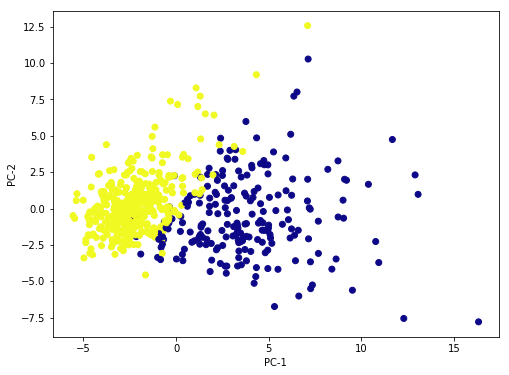

In [15]:
# Using the first two Eigen vectors, show a two-dimensional plot of the dataset with the 
#reduced number of features. The points on the plot should be color-coded based on their values.
plt.figure(figsize=(8,6))
plt.scatter(Xr[:,0], Xr[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.show()

### SVD

In [16]:
# Compute the eigen values and the eigen vectors:

# Singular-value decomposition
U, s, VT = np.linalg.svd(X)
print('Eigen-vectors: U=\n', U, U.shape,'\n')
print('Eigen-values: s=', s, s.shape)
print('Eigen-vectors: VT=', VT.shape,'\n')

Eigen-vectors: U=
 [[ -2.18902444e-01   2.33857132e-01   8.53124284e-03  -4.14089623e-02
    3.77863538e-02  -1.87407904e-02   1.24088340e-01  -7.45229622e-03
    2.23109764e-01  -9.54864432e-02   4.14714866e-02  -5.10674568e-02
   -1.19672116e-02   5.95061348e-02   5.11187749e-02   1.50583883e-01
   -2.02924255e-01  -1.46712338e-01   2.25384659e-01   4.96986642e-02
    6.85700057e-02   7.29289034e-02   9.85526942e-02   1.82579441e-01
   -1.92264989e-02  -1.29476396e-01  -1.31526670e-01  -2.11194013e-01
   -2.11460455e-01  -7.02414091e-01]
 [ -1.03724578e-01   5.97060883e-02  -6.45499033e-02   6.03050001e-01
   -4.94688505e-02   3.21788366e-02  -1.13995382e-02   1.30674825e-01
   -1.12699390e-01  -2.40934066e-01  -3.02243402e-01  -2.54896423e-01
   -2.03461333e-01  -2.15600995e-02   1.07922421e-01   1.57841960e-01
    3.87061187e-02   4.11029851e-02   2.97886446e-02   2.44134993e-01
   -4.48369467e-01   9.48006326e-02   5.54997454e-04  -9.87867898e-02
    8.47459309e-02  -2.45566636e-0

In [17]:
# Let’s take the first two columns (Principle Components) of U and call it Ur
Ur = -U[:, 0:2]
print('Ur=\n', Ur)

Ur=
 [[ 0.21890244 -0.23385713]
 [ 0.10372458 -0.05970609]
 [ 0.22753729 -0.21518136]
 [ 0.22099499 -0.23107671]
 [ 0.14258969  0.18611302]
 [ 0.23928535  0.15189161]
 [ 0.25840048  0.06016536]
 [ 0.26085376 -0.0347675 ]
 [ 0.13816696  0.19034877]
 [ 0.06436335  0.36657547]
 [ 0.20597878 -0.10555215]
 [ 0.01742803  0.08997968]
 [ 0.21132592 -0.08945723]
 [ 0.20286964 -0.15229263]
 [ 0.01453145  0.20443045]
 [ 0.17039345  0.2327159 ]
 [ 0.15358979  0.19720728]
 [ 0.1834174   0.13032156]
 [ 0.04249842  0.183848  ]
 [ 0.10256832  0.28009203]
 [ 0.22799663 -0.21986638]
 [ 0.10446933 -0.0454673 ]
 [ 0.23663968 -0.19987843]
 [ 0.22487053 -0.21935186]
 [ 0.12795256  0.17230435]
 [ 0.21009588  0.14359317]
 [ 0.22876753  0.09796411]
 [ 0.25088597 -0.00825724]
 [ 0.12290456  0.14188335]
 [ 0.13178394  0.27533947]]


In [18]:
# Project the data X onto the reduced matrix Ur
Xr = np.dot(X.T, Ur)

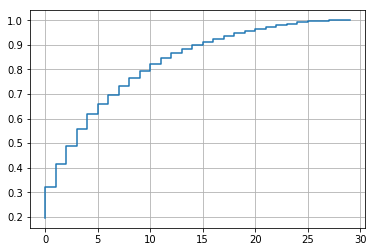

In [19]:
sv = np.cumsum(s)/sum(s)
plt.step(list(range(len(sv))), sv)
plt.grid(True)
plt.show()

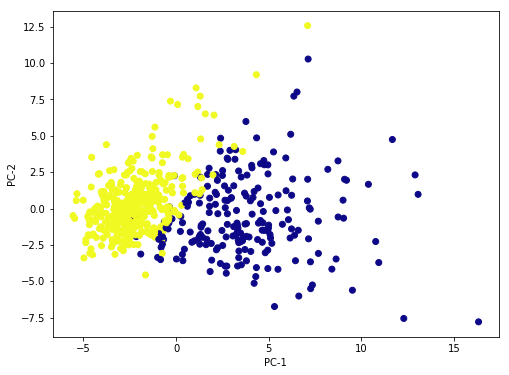

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(Xr[:,0], Xr[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.show()

## Problem 2
* For this problem, you are to implement in Python the Naïve Bayes algorithm (based on the class notes) to classify news headlines. 
* There are approximately 125k news headlines from the year 2013 to 2018 obtained from HuffPost. Each record consists of six attributes:
    * authors: authors who published the article
    * category: the category of the news article
    * date: date article was published
    * headline: the headline of the news article
    * article_link: link to the original news article. Useful for collecting supplementary data
    * short_description: a short description of the news article
* The objective is to identify the type of news based on headlines and short descriptions.



#### Reading a text-based dataset into pandas

In [21]:
# Import Dataset
df = pd.read_json('News_Category_Dataset.json', lines=True)

# Find unique values in category
y_unique = np.unique(df['category'])

# Subset the import data into data used for analysis
X= df[['authors', 'headline','short_description']]

# Add a new column to the data frame name 'Combine_X' which contains the infor from the subset
df['Combine_X'] = df['authors']+' '+df['headline']+' '+df['short_description']

# Add the 'Combine_X' data into a variable 
X_combine = df['Combine_X']

# Add the 'category' data into a variable
Y = df['category']

print('X shape',X.shape)
print('X_combine shape =',X_combine.shape)
print('y shape = ',Y.shape)

X shape (124989, 3)
X_combine shape = (124989,)
y shape =  (124989,)


In [22]:
# Create new Data Frame with 'Combine_X' and 'category'
sms = df[['Combine_X','category']]

# examine the shape
print('sms shape = ',sms.shape,'\n')

# examine the first 10 rows
sms.head()

sms shape =  (124989, 2) 



,Combine_X,category
0,Melissa Jeltsen There Were 2 Mass Shootings In...,CRIME
1,Andy McDonald Will Smith Joins Diplo And Nicky...,ENTERTAINMENT
2,Ron Dicker Hugh Grant Marries For The First Ti...,ENTERTAINMENT
3,Ron Dicker Jim Carrey Blasts 'Castrato' Adam S...,ENTERTAINMENT
4,Ron Dicker Julianna Margulies Uses Donald Trum...,ENTERTAINMENT


In [23]:
# examine the class distribution
sms_class = sms.category.value_counts()
sms_class

POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
BLACK VOICES       3858
THE WORLDPOST      3664
WOMEN              3490
CRIME              2893
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
IMPACT             2602
WORLDPOST          2579
RELIGION           2556
STYLE              2254
WORLD NEWS         2177
TRAVEL             2145
TASTE              2096
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
SCIENCE            1381
ARTS & CULTURE     1339
TECH               1231
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: category, dtype: int64

In [24]:
# Information about the y_unique variable
print('y_unique shape =',y_unique.shape,'\n')
print('y_unique =',y_unique,'\n')

# Create Dictionary of words
y_d = []
for i in range(len(y_unique)):
    y_d.append((y_unique[i],i))
y_dict = dict(y_d)
print('y_dict = ',y_dict)

y_unique shape = (31,) 

y_unique = ['ARTS' 'ARTS & CULTURE' 'BLACK VOICES' 'BUSINESS' 'COLLEGE' 'COMEDY'
 'CRIME' 'EDUCATION' 'ENTERTAINMENT' 'FIFTY' 'GOOD NEWS' 'GREEN'
 'HEALTHY LIVING' 'IMPACT' 'LATINO VOICES' 'MEDIA' 'PARENTS' 'POLITICS'
 'QUEER VOICES' 'RELIGION' 'SCIENCE' 'SPORTS' 'STYLE' 'TASTE' 'TECH'
 'THE WORLDPOST' 'TRAVEL' 'WEIRD NEWS' 'WOMEN' 'WORLD NEWS' 'WORLDPOST'] 

y_dict =  {'ARTS': 0, 'ARTS & CULTURE': 1, 'BLACK VOICES': 2, 'BUSINESS': 3, 'COLLEGE': 4, 'COMEDY': 5, 'CRIME': 6, 'EDUCATION': 7, 'ENTERTAINMENT': 8, 'FIFTY': 9, 'GOOD NEWS': 10, 'GREEN': 11, 'HEALTHY LIVING': 12, 'IMPACT': 13, 'LATINO VOICES': 14, 'MEDIA': 15, 'PARENTS': 16, 'POLITICS': 17, 'QUEER VOICES': 18, 'RELIGION': 19, 'SCIENCE': 20, 'SPORTS': 21, 'STYLE': 22, 'TASTE': 23, 'TECH': 24, 'THE WORLDPOST': 25, 'TRAVEL': 26, 'WEIRD NEWS': 27, 'WOMEN': 28, 'WORLD NEWS': 29, 'WORLDPOST': 30}


In [25]:
# convert category to a numerical variable
sms['label_num'] = sms.category.map(y_dict)

# check that the conversion worked
sms.head()

/Users/Jose/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Combine_X,category,label_num
0,Melissa Jeltsen There Were 2 Mass Shootings In...,CRIME,6
1,Andy McDonald Will Smith Joins Diplo And Nicky...,ENTERTAINMENT,8
2,Ron Dicker Hugh Grant Marries For The First Ti...,ENTERTAINMENT,8
3,Ron Dicker Jim Carrey Blasts 'Castrato' Adam S...,ENTERTAINMENT,8
4,Ron Dicker Julianna Margulies Uses Donald Trum...,ENTERTAINMENT,8


In [26]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.Combine_X
y = sms.label_num
print('X shape = ',X.shape)
print('y shape = ',y.shape)

X shape =  (124989,)
y shape =  (124989,)


In [27]:
# Convert all strings to their lower case form. 
lower_case_X = []
for i in list(X):
    lower_case_X.append(i.lower())
print(lower_case_X[0])

# First line form the data
X_lower = pd.Series(lower_case_X)

melissa jeltsen there were 2 mass shootings in texas last week, but only 1 on tv she left her husband. he killed their children. just another day in america.


In [28]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lower, y,test_size=0.25, random_state=1)


print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (93741,)
X_test shape =  (31248,)
y_train shape =  (93741,)
y_test shape =  (31248,)


/Users/Jose/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Skikit-Learn Implementation.

In [29]:
## Instantiate the vectorizer
vect = CountVectorizer(stop_words='english')

In [30]:
# learn training data vocabulary, then use it to create a document-term matrix

# Fit
vect.fit(X_train)

# Transform training data
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
# this is faster and what most people would do the function is the following:

#X_train_dtm = vect.fit_transform(X_train)

# examine the document-term matrix
print(X_train_dtm)

  (0, 5296)	1
  (0, 9543)	1
  (0, 11568)	1
  (0, 12711)	1
  (0, 12712)	2
  (0, 12991)	1
  (0, 23083)	1
  (0, 23173)	1
  (0, 26969)	1
  (0, 37544)	1
  (0, 48816)	1
  (0, 52605)	1
  (0, 53638)	1
  (0, 53679)	1
  (0, 54950)	1
  (0, 58467)	1
  (0, 62452)	1
  (0, 63802)	1
  (1, 8011)	1
  (1, 21305)	1
  (1, 29770)	1
  (1, 38112)	1
  (1, 60363)	1
  (1, 61081)	1
  (1, 66519)	1
  :	:
  (93740, 19896)	1
  (93740, 21483)	1
  (93740, 22638)	1
  (93740, 23559)	1
  (93740, 28995)	2
  (93740, 30164)	1
  (93740, 33112)	2
  (93740, 34700)	1
  (93740, 38511)	1
  (93740, 38702)	1
  (93740, 40321)	1
  (93740, 42691)	1
  (93740, 44201)	1
  (93740, 45038)	1
  (93740, 45938)	1
  (93740, 47378)	1
  (93740, 47529)	1
  (93740, 47797)	1
  (93740, 48876)	1
  (93740, 51390)	1
  (93740, 52257)	1
  (93740, 59756)	2
  (93740, 62844)	1
  (93740, 63814)	1
  (93740, 65646)	1


In [31]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<31248x68858 sparse matrix of type '<class 'numpy.int64'>'
	with 521786 stored elements in Compressed Sparse Row format>

In [32]:
# Instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [33]:
# Train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time nb.fit(X_train_dtm, y_train)

CPU times: user 242 ms, sys: 63.9 ms, total: 306 ms
Wall time: 329 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
# Make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [35]:
# calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.67175499231950841

In [36]:
# examine class distribution
print(y_test.value_counts())

# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1208
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(1208 / (1208 + 185)))

17    8220
8     3565
12    1709
18    1246
3     1025
21     993
16     986
5      974
2      919
25     918
28     825
6      774
15     724
19     703
11     692
27     678
13     665
30     639
22     588
23     535
26     535
29     526
0      364
20     354
9      351
10     340
1      326
24     305
14     290
4      241
7      238
Name: label_num, dtype: int64
Null accuracy: 17    0.263057
Name: label_num, dtype: float64
Manual null accuracy: 0.8671931083991385


In [37]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 161,   37,    6,    8,    0,    1,    0,    1,   79,    0,    0,
           1,   29,    5,    0,    0,    2,   11,   13,    1,    0,    2,
           0,    0,    0,    0,    1,    0,    2,    0,    4],
       [  29,   68,    6,    2,    0,    5,    1,    0,  135,    0,    0,
           1,   10,    0,    0,    0,    6,   40,    7,    1,    0,    2,
           0,    0,    0,    2,    3,    1,    5,    2,    0],
       [   0,    0,  400,    8,    1,    1,   50,    2,  173,    0,    0,
           0,   16,    3,    0,    2,    8,  209,   12,    8,    0,   13,
           4,    0,    0,    0,    0,    0,    9,    0,    0],
       [   0,    0,    3,  610,    0,    1,    1,    1,   22,    0,    0,
           5,   71,    4,    0,    5,    4,  260,    2,    0,    0,    5,
           0,    2,    1,    2,    5,    2,   14,    2,    3],
       [   0,    0,    1,   27,   36,    0,    3,    3,    7,    0,    0,
           0,   29,    3,    0,    0,    5,  114,    4,    0,    0,    2,
        

In [38]:
# print message text for the false positives (ham incorrectly classified as spam)
X_test[y_pred_class > y_test]

113125    dr. sharon ufberg, contributorco-founder borro...
99566     joanne dagonese, contributorinnovative thinker...
100507    margaret manning, contributorauthor, founder o...
91683     hooplaha, contributordedicated to delivering o...
4035      ron dicker craig mack, 'flava in ya ear' rappe...
8050      carol kuruvilla 'roseanne' revival will featur...
45649     andy mcdonald christopher columbus and donald ...
116982    roque planas activists ask new york mayor to s...
115409    mary anna dennard, contributorfounder, college...
23909     kathryn m. flinn, contributorassistant profess...
114270    bill bradley letterman remembers his friend of...
118368    ryan grenoble newtown victim's animal sanctuar...
72262     lee moran dj played snorting 'peppa pig' theme...
90222     bill bradley 'avengers' strangely makes more s...
117199    robert whitcomb, contributorprovidence-based e...
118740    alexander c. kaufman hobby lobby still covers ...
85168     paige lavender john mccain res

In [39]:
# alternative less elegant but easier to understand
X_test[(y_pred_class==1) & (y_test==0)]

94135     katherine brooks this gorgeous 'live' sculptur...
113473    katherine brooks indigenous performance artist...
121310    priscilla frank 12 stunning reasons new yorker...
100341    katherine brooks tattoo duo brings incredibly ...
91114     maddie crum this grrrl power video game is eve...
108502    katherine brooks beloved author and leonardo d...
95095     katherine brooks 60 years of jane doe portrait...
113298    priscilla frank here's a hermit crab shelter b...
98993     katherine brooks nude photography, by women of...
119226    katherine brooks 27 (more) photographers you n...
102032    priscilla frank this is what happens when adul...
98729     priscilla frank texas 'draw the prophet' conte...
103615    priscilla frank you can now go to art school a...
99592     priscilla frank photographer captures stunning...
113658    priscilla frank this badass lady taxidermist s...
108095    priscilla frank hbo tags youtube in anticipati...
88255     maddie crum for one year, this

In [40]:
# print message text for the false negatives (spam incorrectly classified as ham)
X_test[y_pred_class < y_test]

3998      ron dicker man dressed as elsa from 'frozen' p...
89940      priest fired as seton hall chaplain comes out...
23659     clara g. herrera, contributori am a mama, scie...
20895     outspeak, contributoroutspeak™ is the opinion ...
103025           putin signs new russian military doctrine 
52716     damon dahlen and lee moran the fashion at the ...
123060     at least 40 dead as boat carrying migrants si...
123142    suzan mazur, contributorauthor, 'the origin of...
5826      karolos grohmann, reuters winter olympics orga...
7854      carol kuruvilla finnish chain builds 'game of ...
73941     lee moran the king of sweden wants to ban you ...
34734     daniel marans donald trump suggests he may not...
117519    leena suleiman, contributorhumanitarian progra...
39379     nick robins-early far-right politicians rush t...
44317     julia craven heartbreaking new documentary imm...
41611     john mariani, contributorpublisher of "mariani...
24014     erin raffety, contributoranthr

In [41]:
# alternative less elegant but easier to understand
X_test[(y_pred_class==0) & (y_test==1)]

23487    priscilla frank art of iranian immigrants reve...
62759    priscilla frank colorful architecture, because...
46346    priscilla frank artist races against time to p...
55768    john seed, contributorprofessor of art history...
41277    priscilla frank pussy riot to perform in 'poli...
49835    priscilla frank how an ordinary ballpoint pen ...
78725    priscilla frank instagram account documents th...
44990    priscilla frank a palestinian woman spent 20 s...
34835    priscilla frank artists with disabilities toy ...
31838    priscilla frank the sickly sweet children's bo...
13365    abigail rockwell, contributorjazz singer/songw...
32089    d. dominick lombardi, contributorartist, art w...
43651    priscilla frank here's why teaching kids about...
46274    kate abbey-lambertz dozens of artists filled a...
32981    priscilla frank how a ghanian-german artist us...
39141    katherine brooks at 70 years old, marina abram...
55122    james scarborough, contributorwriter inmates r.

In [42]:
# example false negative
X_test[23487]

'priscilla frank art of iranian immigrants reveals the creative potential of inclusivity gallery looks "beyond the ban" to highlight the role art can play in uncertain times.'

### Own Implementation

In [43]:
# Removing all punctuations
sans_punctuation_X = []
for i in lower_case_X:
    sans_punctuation_X.append(i.translate(str.maketrans('', '', string.punctuation)))
print('First line from the data')
print(sans_punctuation_X[0])

First line from the data
melissa jeltsen there were 2 mass shootings in texas last week but only 1 on tv she left her husband he killed their children just another day in america


In [44]:
# Tokenization
preprocessed_X = []
for i in sans_punctuation_X:
    preprocessed_X.append(i.split(' '))
print('First line from the data')
print(preprocessed_X[0])

First line from the data
['melissa', 'jeltsen', 'there', 'were', '2', 'mass', 'shootings', 'in', 'texas', 'last', 'week', 'but', 'only', '1', 'on', 'tv', 'she', 'left', 'her', 'husband', 'he', 'killed', 'their', 'children', 'just', 'another', 'day', 'in', 'america']


In [45]:
# Initialize the blank variable slots
MyTable=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
MyTable2=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(len(y_train)):
    indices=y[i]
    MyTable[indices].append(preprocessed_X[i])
    MyTable2[indices].extend(preprocessed_X[i])

print('MyTable length =', len(MyTable))
print('MyTable2 length =', len(MyTable2))

MyTable length = 31
MyTable2 length = 31


In [46]:
# Count frequencies
frequency_list = []

for i in MyTable2:
    frequency_counts = Counter(i)
    freq_dictionary = {k:np.log(v/len(frequency_counts)) for k,v in frequency_counts.items()}
    frequency_list.append(freq_dictionary)
print('The number of unique words in the first category for Frequency list = ',(len(frequency_list[0])))
print('The number of unique words in the first category = ', len(Counter(MyTable2[0])))

The number of unique words in the first category for Frequency list =  4695
The number of unique words in the first category =  4695


In [47]:
prior=np.zeros(len(y_unique))
prior_log=np.zeros(len(y_unique))
for i in range(len(y_unique)):
    #list_dictionary = frequency_list
    prior[i]=len(MyTable[i])/len(y)
    prior_log[i]=np.log(prior[i])

In [48]:
def classify(msg,y_unique,prior_log,list_dictionary):
    class_prior=prior_log.copy()
    class_prior=np.zeros(len(prior_log))
    for i in range(len(frequency_list)):
        for m in msg:
            if m in list_dictionary[i]:
                class_prior[i]=class_prior[i] + list_dictionary[i][m]
    return class_prior.argmin()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(pd.Series(preprocessed_X),Y,test_size=0.25,random_state=1)
X_train=X_train.reset_index(drop=True)   #reset index
X_test=X_test.reset_index(drop=True)     #reset index
y_train=y_train.reset_index(drop=True)   #reset index
y_test=y_test.reset_index(drop=True)     #reset index

In [50]:
predict=y_test.copy()
for i in range(len(predict)):
    label_index=classify(X_test[i],y_unique,prior_log,frequency_list)
    predict[i]=y_unique[label_index]   

In [51]:
pred=np.zeros(len(predict))
for i in range(len(predict)):
    if predict[i] == y_test[i]:
        pred[i]=1 

In [52]:
sum(pred)/len(pred)

0.30699564772145416

## Problem 3

Implement in Python the Naïve Bayes algorithm for the digits dataset in the Scikit-Learn library. Compare your results against the results obtained by using the Scikit-Learn implementation of the Naïve Bayes algorithm.  

### Scikit Learn Implementation

In [53]:
# Import Data
digits = load_digits()

In [54]:
# Assign data to X and y data sets
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, 64))
y = digits.target.reshape((n_samples,1))

In [55]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=49)

In [56]:
# Train model
model = GaussianNB()
model.fit(X_train, np.ravel(y_train, order='C'))

GaussianNB(priors=None)

In [57]:
# Accuracy based on the train data
predicted = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted))

0.873840445269


In [58]:
# Accuracy based on the test data
predicted = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.844444444444


### Our Implementation

In [59]:
for i in range(len(X_train)):
    x = [0 if x < 8 else 1 for x in X_train[i]]
    X_train[i]=np.multiply(range(1,len(x)+1),x)
    
for i in range(len(X_test)):
    x = [0 if x < 8 else 1 for x in X_test[i]]
    X_test[i]=np.multiply(range(1,len(x)+1),x)
    
Y_test=np.zeros(len(y_test))
Y_train=np.zeros(len(y_train))
for i in range(len(y_train)):
    Y_train[i]=y_train[i][0]
    
for i in range(len(y_test)):
    Y_test[i]=y_test[i][0]

In [60]:
#Function to find the frequency of words:
def create_word_frequency(messages):
    #dictionary = dict(enumerate(messages))
    dictionary = Counter(messages)
    dictionary = {k:dictionary[k] for k in sorted(dictionary, key=dictionary.get, reverse=True)}
    perc_data=math.floor(len(dictionary)*.99)
    #dict_index=list(dictionary)[perc_data]
    dict_index=list(dictionary)[0]
    val=dictionary[dict_index]
    dictionary = dict((k, v) for k, v in dictionary.items() if v < val)
    freq_dictionary = {k:np.log(v/len(dictionary)) for k,v in dictionary.items()}
    return freq_dictionary

In [61]:
# Create empty variabel based on the number of unique labels
labels=np.unique(Y_train)
#MyTable=[]*len(labels)
MyTable=[[],[],[],[],[],[],[],[],[],[]]
MyTable2=[[],[],[],[],[],[],[],[],[],[]]
labels

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [62]:
for data in range(len(Y_train)):
    itemindex = np.where(labels==Y_train[data])
    indices=itemindex[0][0]
    MyTable[indices].append(X_train[data])
    MyTable2[indices].extend(X_train[data])
    #MyTable2[indices] =MyTable2[indices] + X_train[data]

list_dictionary = [{},{},{},{},{},{},{},{},{},{}]

In [63]:
# Get Frequecny for each label
prior=np.zeros(len(labels))
prior_log=np.zeros(len(labels))
for i in range(len(labels)):
    list_dictionary[i] =create_word_frequency(MyTable2[i])
    prior[i]=len(MyTable[i])/len(y_train)
    prior_log[i]=np.log(prior[i])

In [64]:
def classify(msg,labels,prior_log,list_dictionary):
    class_prior=prior_log.copy()
    #class_prior=np.zeros(len(prior_log))
    for i in range(len(labels)):
        for m in msg:
            if m in list_dictionary[i]:
                class_prior[i]=class_prior[i] + list_dictionary[i][m]
    class_prior=np.exp(class_prior)
    return class_prior.argmax()

In [65]:
# Test model on train data
predict=Y_train.copy()
for i in range(len(predict)):
    label_index=classify(X_train[i],labels,prior_log,list_dictionary)
    predict[i]=labels[label_index]

np.mean(predict == Y_train)

0.79591836734693877

In [66]:
# Test model on test data
predict=Y_test.copy()
for i in range(len(predict)):
    label_index=classify(X_test[i],labels,prior_log,list_dictionary)
    predict[i]=labels[label_index]

np.mean(predict == Y_test)

0.77222222222222225

__Why are we splitting into training and testing sets before vectorizing?__

__Background of train/test split__ 

* Train/test split is for model evaluation
* Model evaluation is to simulate the future
* Past data is exchangeable for future data
* We pretend some of our past data is coming into our future data
* By training, predicting and evaluating the data, we can check the performance of our model

__Vectorize then split__

* If we vectorize then we train/test split, our document-term matrix would contain every single feature (word) in the test and training sets
    * What we want is to simulate the real world
    * We would always see words we have not seen before so this method is not realistic and we cannot properly evaluate our models

__Split then vectorize (correct way)__

* We do the train/test split before the CountVectorizer to properly simulate the real world where our future data contains words we have not seen before

After you train your data and chose the best model, you would then train on all of your data before predicting actual future data to maximize learning.